<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/NN-online/blob/main/12Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from sklearn.datasets import fetch_olivetti_faces

## Olivetti Faces

In [ ]:
data=fetch_olivetti_faces()
data['images'][0,0]

#### Create "noisy" images

In [ ]:
imgs=data['images']
imgs=imgs.reshape(imgs.shape[0],64,64,1)
labels=data['target']
print(imgs.shape)
print(labels.shape)
noise_factor = 0.1

imgs_train=imgs[0:350,:,:]
imgs_test=imgs[350:,:,:]
imgs_train_noisy = imgs_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_train.shape) 
imgs_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape) 
plt.imshow(np.squeeze(imgs_train_noisy[0].reshape(64,64)),cmap='gray')


In [ ]:
input_img = keras.Input(shape=(64, 64, 1))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=layers.MaxPool2D((2,2),padding='same')(x)


#x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
#x = layers.UpSampling2D((2, 2))(x)
x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')#loss='binary_crossentropy')


In [ ]:
tf.keras.utils.plot_model(autoencoder,show_shapes=True)

In [ ]:
autoencoder.fit(imgs_train_noisy, imgs_train,
                epochs=20,
                batch_size=20,
                shuffle=True,
                verbose=1,
                validation_data=(imgs_test_noisy, imgs_test))

In [ ]:
p=autoencoder.predict(imgs_test_noisy)
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(imgs_test[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(imgs_test_noisy[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## MNIST Data

In [16]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


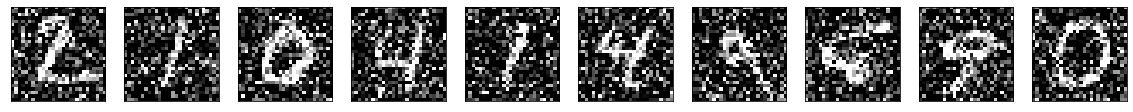

In [17]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(input_img)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2, 2))(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='mean_squared_error')#loss='binary_crossentropy')
autoencoder.compile(loss='mean_squared_error')

In [ ]:
try:
    autoencoders.load_weights("weights.h5")
except:
    pass

In [26]:
autoencoder.fit(x_train_noisy, x_train,epochs=20,batch_size=512,shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
118/118 [==============================] - 2s 19ms/step - loss: 0.0601 - val_loss: 0.0353
Epoch 2/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0281 - val_loss: 0.0234
Epoch 3/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0218 - val_loss: 0.0207
Epoch 4/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0191 - val_loss: 0.0176
Epoch 5/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 6/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 7/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0155 - val_loss: 0.0155
Epoch 8/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0149 - val_loss: 0.0150
Epoch 9/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 10/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0141 - val_lo

In [ ]:
autoencoder.save_weights("weights.h5")

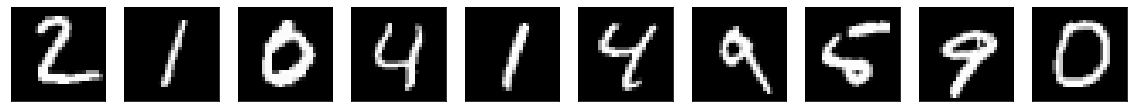

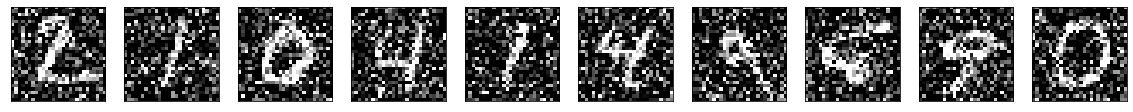

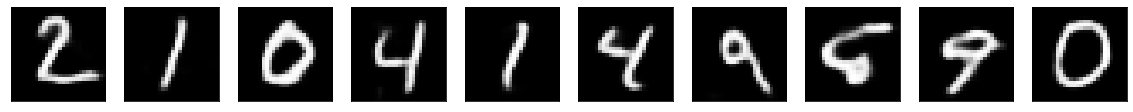

In [27]:
p=autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Autoencoder using Dense layers

In [13]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),784)
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),784)

autoencoder = keras.models.Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
trained_model = autoencoder.fit(x_train_noisy, x_train, batch_size=1024, epochs=20, verbose=1, validation_data=(x_test_noisy, x_test))



Epoch 1/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0792 - val_loss: 0.0597
Epoch 2/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0500 - val_loss: 0.0430
Epoch 3/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0363
Epoch 4/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0348 - val_loss: 0.0330
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0323 - val_loss: 0.0313
Epoch 6/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.0301
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0299 - val_loss: 0.0293
Epoch 8/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.0285
Epoch 9/20
59/59 [==============================] - 0s 7ms/step - loss: 0.0282 - val_loss: 0.0276
Epoch 10/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0270
Epoch 11/20
59/59 [

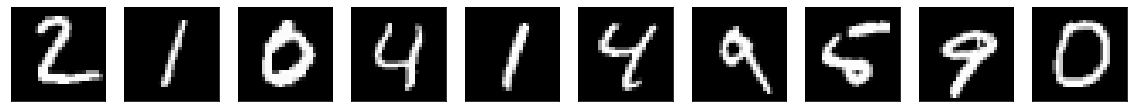

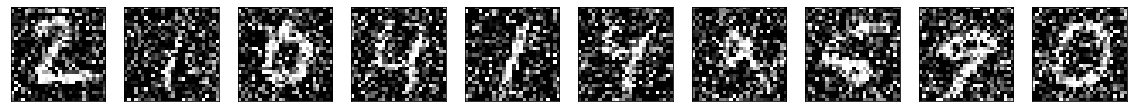

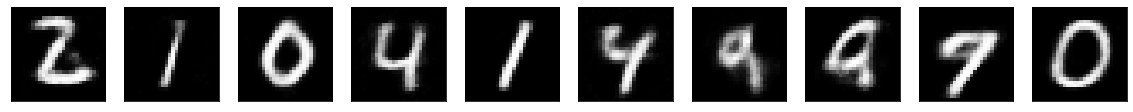

In [14]:
p=autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()